In [1]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
#own functions
import functions as f

#accessing aws data
import sys
sys.path.append('../utils')
from db_utils import DBUtil 

#for ipython display
import matplotlib.pyplot as plt
from IPython.display import display, HTML
%matplotlib inline
pd.set_option('display.height', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)

In [2]:
#connect to aws
dbu = DBUtil("komodo_redshift","../../databases/database.conf")

In [3]:
%%time
query = """
select ilink,
count(*) as N_Dresses2018 
from jjill.jjill_keyed_data
where is_emailable_ind='Y'
and department_name = 'Dresses'
and order_date between '2018-01-01' and '2018-04-30'
group by 1 order by 1;
"""
DF3 = dbu.get_df_from_query(query)
DF3.columns = map(str.upper,DF3.columns)

CPU times: user 155 ms, sys: 48.3 ms, total: 203 ms
Wall time: 2.34 s


In [4]:
DF1 = pd.read_pickle('../data/numeric_fts_2017.pkl')
DF2 = pd.read_pickle('../data/categorical2017.pkl')
DF1.columns = map(str.upper, DF1.columns)
DF2.columns = map(str.upper, DF2.columns)

In [5]:
DF = DF1.merge(DF2,on=['ILINK','DEPARTMENT_NAME'])
DF = DF.merge(DF3,how='outer',on='ILINK')

In [6]:
DF['N_DRESSES2018'].fillna(0,inplace=True)

In [7]:
print DF.shape
DF.head(5)

(338744, 42)


,ILINK,DEPARTMENT_NAME,TOTAL_BOUGHT,SHIPPED_SOLD_AMT,AVG_SHIPPED_SOLD_AMT,STD_SHIPPED_SOLD_AMT,VAR_SHIPPED_SOLD_AMT,DISCOUNT,AVG_DISCOUNT,STD_DISCOUNT,VAR_DISCOUNT,ENDUSE_HAS_CORE,ENDUSE_HAS_WEAREVER,ENDUSE_HAS_PUREJILL,PAYTYPE_HAS_JJC,PAYTYPE_HAS_VISA,PAYTYPE_HAS_MC,PAYTYPE_HAS_AMEX,PAYTYPE_HAS_DISC,PAYTYPE_HAS_DEBIT,PAYTYPE_HAS_CASH,PAYTYPE_HAS_CK,PAYTYPE_HAS_OTHER,FABRICCATEGORY_HAS_COTTON/COTTONBL,FABRICCATEGORY_HAS_SYNTHETIC/SYNBLEND,FABRICCATEGORY_HAS_LINEN/LINENBL,ENDUSE_%_CORE,ENDUSE_%_WEAREVER,ENDUSE_%_PUREJILL,PAYTYPE_%_JJC,PAYTYPE_%_VISA,PAYTYPE_%_MC,PAYTYPE_%_AMEX,PAYTYPE_%_DISC,PAYTYPE_%_DEBIT,PAYTYPE_%_CASH,PAYTYPE_%_CK,PAYTYPE_%_OTHER,FABRICCATEGORY_%_COTTON/COTTONBL,FABRICCATEGORY_%_SYNTHETIC/SYNBLEND,FABRICCATEGORY_%_LINEN/LINENBL,N_DRESSES2018
0,0000000004,Pants,9.0,378.84,42.093333,15.642059,244.674025,208.1,23.122222,3.723835,13.866944,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.556,0.444,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.444,0.0,0.0
1,0000000004,Woven Shirts,3.0,134.28,44.760000,15.190086,230.738700,64.7,21.566667,6.690541,44.763333,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000,0.000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.667,0.000,0.0,0.0
2,0000000004,Knit Tops,7.0,215.86,30.837143,10.477951,109.787457,121.1,17.300000,2.733740,7.473333,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.429,0.571,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.571,0.0,0.0
3,0000000023,Pants,1.0,27.99,27.990000,NaN,NaN,12.0,12.000000,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000,0.000,0.0,0.0
4,0000000023,Knit Tops,1.0,27.30,27.300000,NaN,NaN,11.7,11.700000,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.000,0.000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000,0.000,0.0,0.0


In [8]:
DF4 = DF[DF.DEPARTMENT_NAME=='Dresses']

In [9]:
NUMERIC_FTS = ['TOTAL_BOUGHT','SHIPPED_SOLD_AMT','AVG_SHIPPED_SOLD_AMT',
       'STD_SHIPPED_SOLD_AMT','VAR_SHIPPED_SOLD_AMT','DISCOUNT',
       'AVG_DISCOUNT','STD_DISCOUNT','VAR_DISCOUNT','N_DRESSES2018']
CATEG_FTS = ['ENDUSE_Has_Core','ENDUSE_Has_Wearever',
 'ENDUSE_Has_PureJill','PAYTYPE_Has_JJC','PAYTYPE_Has_VISA',
 'PAYTYPE_Has_MC','PAYTYPE_Has_AMEX','PAYTYPE_Has_DISC','PAYTYPE_Has_DEBIT',
 'PAYTYPE_Has_CASH','PAYTYPE_Has_CK','PAYTYPE_Has_OTHER','FABRICCATEGORY_Has_Cotton/CottonBl',
 'FABRICCATEGORY_Has_Synthetic/SynBlend','FABRICCATEGORY_Has_Linen/LinenBl',
 'ENDUSE_%_Core','ENDUSE_%_Wearever','ENDUSE_%_PureJill',
 'PAYTYPE_%_JJC','PAYTYPE_%_VISA','PAYTYPE_%_MC','PAYTYPE_%_AMEX','PAYTYPE_%_DISC',
 'PAYTYPE_%_DEBIT','PAYTYPE_%_CASH','PAYTYPE_%_CK','PAYTYPE_%_OTHER',
 'FABRICCATEGORY_%_Cotton/CottonBl','FABRICCATEGORY_%_Synthetic/SynBlend',
 'FABRICCATEGORY_%_Linen/LinenBl','N_DRESSES2018']
CATEG_FTS = map(str.upper,CATEG_FTS)

# Woven Shirts Customers Only

## Numeric Fts Correlations/Scatter Matrix

,TOTAL_BOUGHT,N_DRESSES2018
TOTAL_BOUGHT,1.00000,0.44526
N_DRESSES2018,0.44526,1.00000


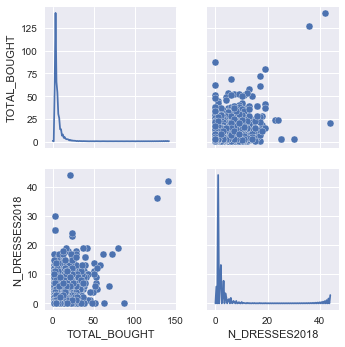

In [10]:
fts = [NUMERIC_FTS[0]]+['N_DRESSES2018']
display(DF4[fts].corr())
sns.pairplot(DF4,vars=fts,diag_kind='kde');

,SHIPPED_SOLD_AMT,AVG_SHIPPED_SOLD_AMT,STD_SHIPPED_SOLD_AMT,VAR_SHIPPED_SOLD_AMT,N_DRESSES2018
SHIPPED_SOLD_AMT,1.000000,0.137887,0.143595,0.042082,0.410103
AVG_SHIPPED_SOLD_AMT,0.137887,1.000000,0.028715,0.004505,-0.061750
STD_SHIPPED_SOLD_AMT,0.143595,0.028715,1.000000,0.921796,0.022189
VAR_SHIPPED_SOLD_AMT,0.042082,0.004505,0.921796,1.000000,-0.022290
N_DRESSES2018,0.410103,-0.061750,0.022189,-0.022290,1.000000


/Users/alexanderpan/anaconda/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/Users/alexanderpan/anaconda/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


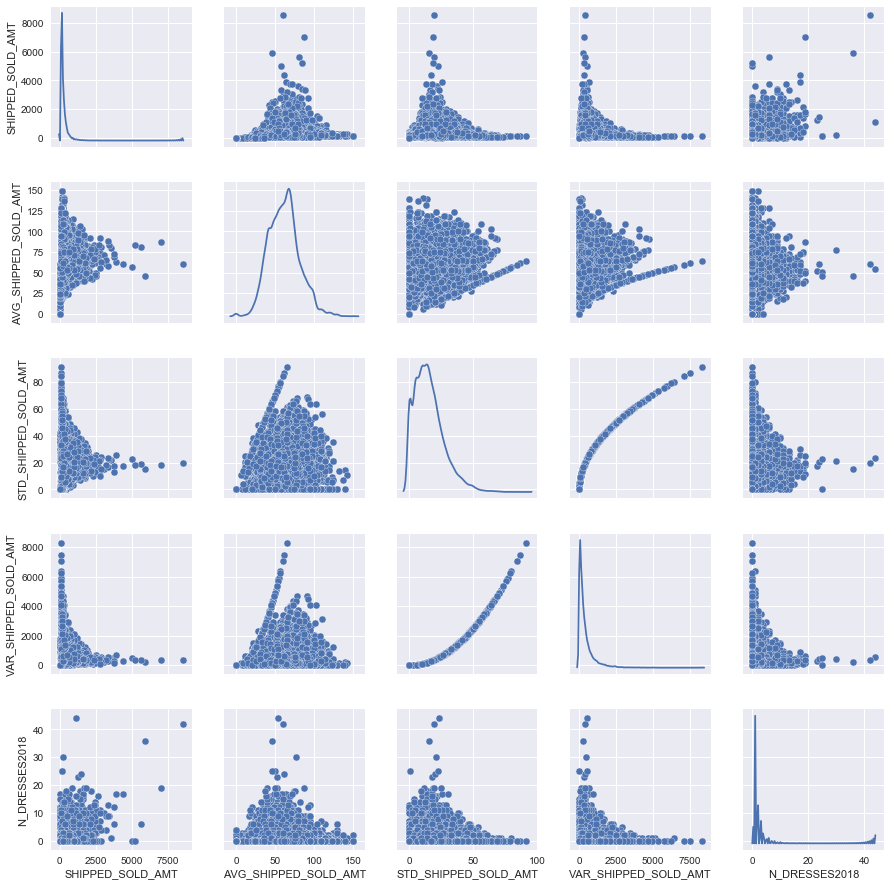

In [11]:
fts = NUMERIC_FTS[1:5]+['N_DRESSES2018']
display(DF4[fts].corr())
sns.pairplot(DF4,vars=fts,diag_kind='kde');

,DISCOUNT,AVG_DISCOUNT,STD_DISCOUNT,VAR_DISCOUNT,N_DRESSES2018
DISCOUNT,1.000000,0.235512,0.097960,0.001949,0.445384
AVG_DISCOUNT,0.235512,1.000000,-0.138253,-0.159636,0.039535
STD_DISCOUNT,0.097960,-0.138253,1.000000,0.933496,0.045909
VAR_DISCOUNT,0.001949,-0.159636,0.933496,1.000000,-0.000842
N_DRESSES2018,0.445384,0.039535,0.045909,-0.000842,1.000000


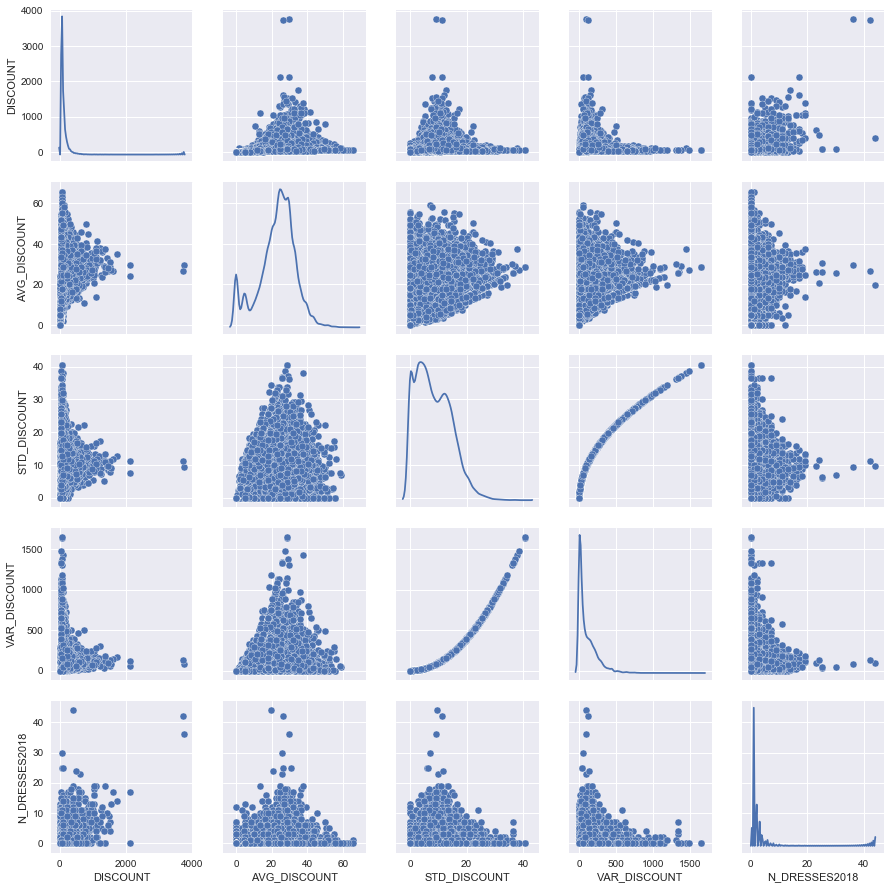

In [12]:
fts = NUMERIC_FTS[5:]
display(DF4[fts].corr())
sns.pairplot(DF4,vars=fts,diag_kind='kde');

## Categorical Fts Correlation/Scatter Matrix

In [14]:
#fts = CATEG_FTS[0:3]+['N_KNITTOPS2018']
#display(DFPants[fts].corr())
#sns.pairplot(DF4,vars=fts,diag_kind='kde');

In [15]:
#fts = CATEG_FTS[3:6]+['N_KNITTOPS2018']
#display(DFPants[fts].corr())
#sns.pairplot(DF4,vars=fts,diag_kind='kde');

In [16]:
#fts = CATEG_FTS[6:9]+['N_KNITTOPS2018']
#display(DFPants[fts].corr())
#sns.pairplot(DF4,vars=fts,diag_kind='kde');

In [17]:
#fts = CATEG_FTS[9:12]+['N_KNITTOPS2018']
#display(DFPants[fts].corr())
#sns.pairplot(DF4,vars=fts,diag_kind='kde');

In [18]:
#fts = CATEG_FTS[12:15]+['N_KNITTOPS2018']
#display(DFPants[fts].corr())
#g = sns.pairplot(DF4,vars=fts,diag_kind='kde',size=4);

,ENDUSE_%_CORE,ENDUSE_%_WEAREVER,ENDUSE_%_PUREJILL,N_DRESSES2018
ENDUSE_%_CORE,1.000000,-0.701414,-0.518063,-0.008496
ENDUSE_%_WEAREVER,-0.701414,1.000000,-0.246272,0.005225
ENDUSE_%_PUREJILL,-0.518063,-0.246272,1.000000,0.005300
N_DRESSES2018,-0.008496,0.005225,0.005300,1.000000


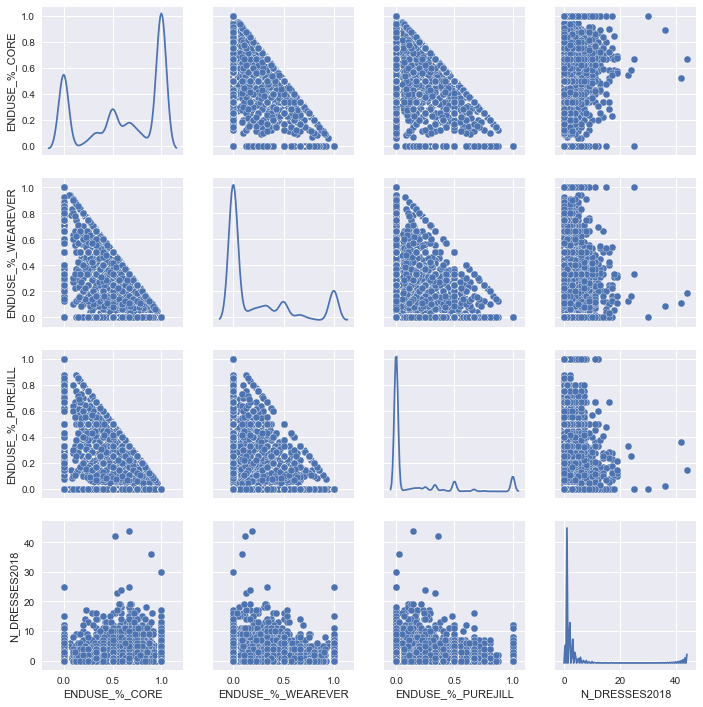

In [13]:
fts = CATEG_FTS[15:18]+['N_DRESSES2018']
display(DF4[fts].corr())
sns.pairplot(DF4,vars=fts,diag_kind='kde');

,PAYTYPE_%_JJC,PAYTYPE_%_VISA,PAYTYPE_%_MC,N_DRESSES2018
PAYTYPE_%_JJC,1.000000,-0.612748,-0.361719,0.062513
PAYTYPE_%_VISA,-0.612748,1.000000,-0.172370,-0.036239
PAYTYPE_%_MC,-0.361719,-0.172370,1.000000,-0.019097
N_DRESSES2018,0.062513,-0.036239,-0.019097,1.000000


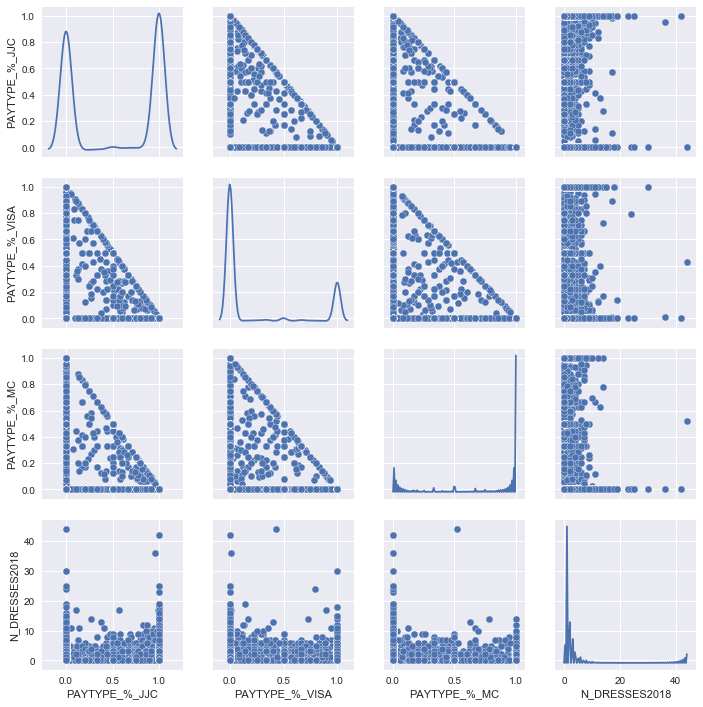

In [14]:
fts = CATEG_FTS[18:21]+['N_DRESSES2018']
display(DF4[fts].corr())
sns.pairplot(DF4,vars=fts,diag_kind='kde');

,PAYTYPE_%_AMEX,PAYTYPE_%_DISC,PAYTYPE_%_DEBIT,N_DRESSES2018
PAYTYPE_%_AMEX,1.000000,-0.035513,-0.035993,-0.017146
PAYTYPE_%_DISC,-0.035513,1.000000,-0.018509,-0.008193
PAYTYPE_%_DEBIT,-0.035993,-0.018509,1.000000,-0.017834
N_DRESSES2018,-0.017146,-0.008193,-0.017834,1.000000


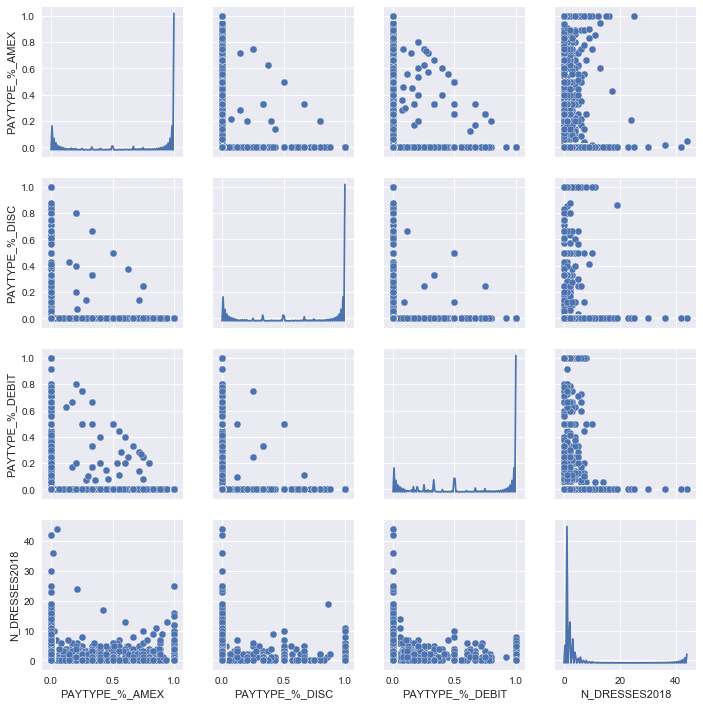

In [15]:
fts = CATEG_FTS[21:24]+['N_DRESSES2018']
display(DF4[fts].corr())
sns.pairplot(DF4,vars=fts,diag_kind='kde');

,PAYTYPE_%_CASH,PAYTYPE_%_CK,PAYTYPE_%_OTHER,N_DRESSES2018
PAYTYPE_%_CASH,1.000000,0.005904,-0.005489,-0.013890
PAYTYPE_%_CK,0.005904,1.000000,0.000039,-0.003623
PAYTYPE_%_OTHER,-0.005489,0.000039,1.000000,-0.013354
N_DRESSES2018,-0.013890,-0.003623,-0.013354,1.000000


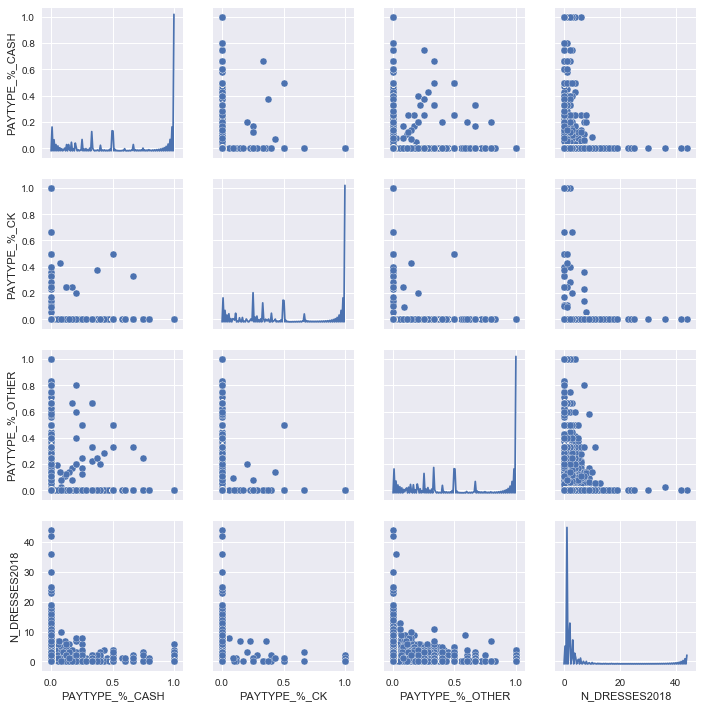

In [16]:
fts = CATEG_FTS[24:27]+['N_DRESSES2018']
display(DF4[fts].corr())
sns.pairplot(DF4,vars=fts,diag_kind='kde');

,FABRICCATEGORY_%_COTTON/COTTONBL,FABRICCATEGORY_%_SYNTHETIC/SYNBLEND,FABRICCATEGORY_%_LINEN/LINENBL,N_DRESSES2018
FABRICCATEGORY_%_COTTON/COTTONBL,1.000000,-0.292299,-0.157945,0.014673
FABRICCATEGORY_%_SYNTHETIC/SYNBLEND,-0.292299,1.000000,-0.276850,-0.007786
FABRICCATEGORY_%_LINEN/LINENBL,-0.157945,-0.276850,1.000000,-0.024568
N_DRESSES2018,0.014673,-0.007786,-0.024568,1.000000


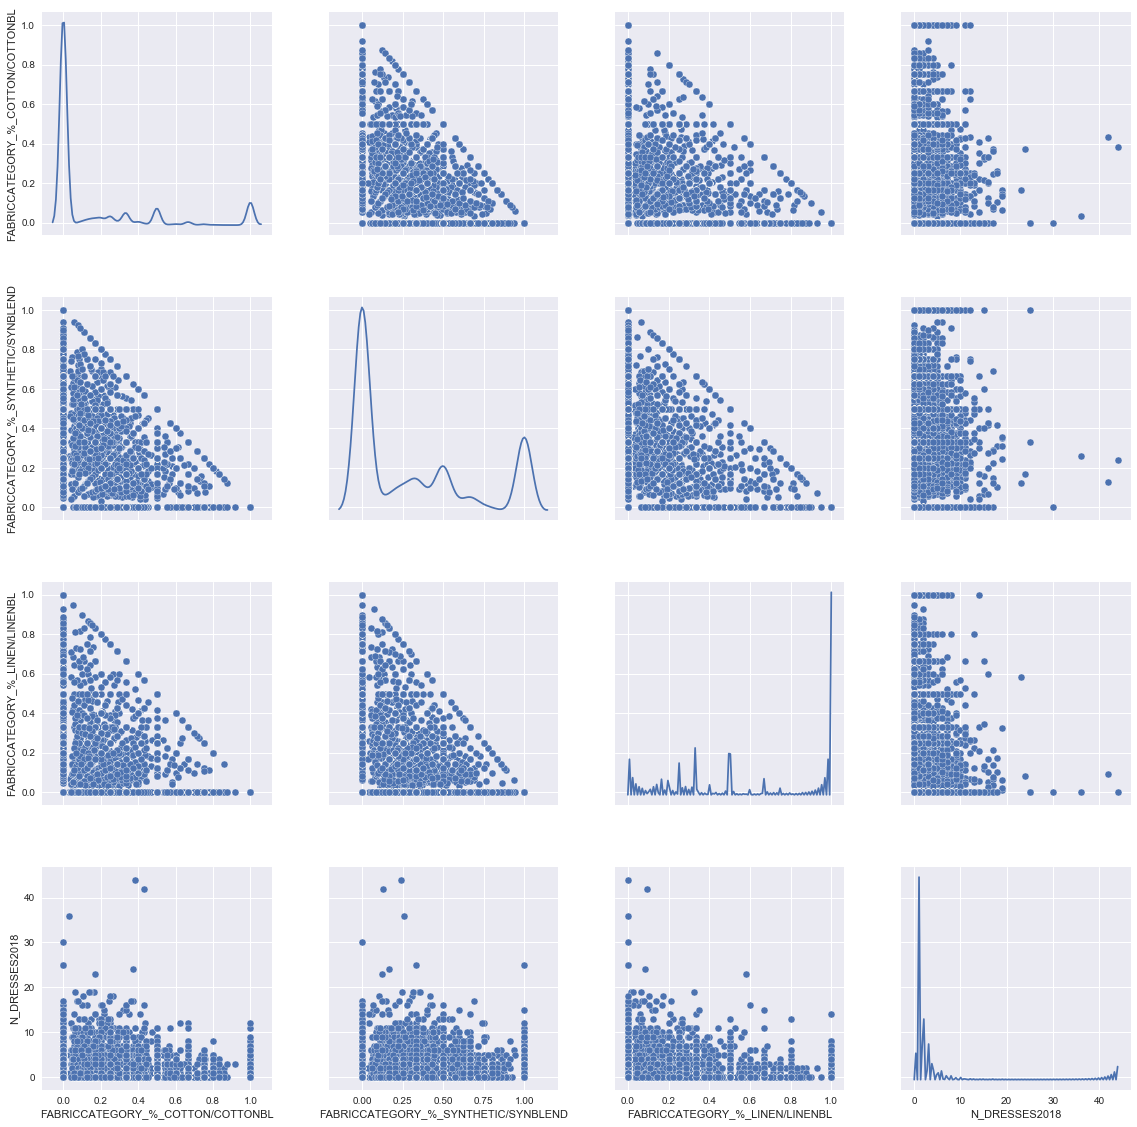

In [17]:
fts = CATEG_FTS[27:30]+['N_DRESSES2018']
display(DF4[fts].corr())
sns.pairplot(DF4,vars=fts,diag_kind='kde',size=4);